In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'GDP - HW4.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data.head()

,Country,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,ABW,33120.054180,32117.912320,30862.222690,31387.282960,34176.464600,35207.577240,36362.219320,37865.493490,38515.263800,34693.086750,33732.847450
1,Afghanistan,AFG,NaN,NaN,839.485886,888.153370,885.840819,979.273979,1031.643135,1176.126357,1218.118215,1454.663015,1637.377987
2,Angola,AGO,3097.307292,3191.266323,3564.096026,3614.607278,3978.697194,4555.185842,5048.876449,5697.251328,6221.423373,6092.783245,6230.297028
3,Albania,ALB,3861.334172,4301.352799,4661.371553,4994.518807,5422.778462,5865.306196,6559.783257,7276.302969,8228.374239,8814.810856,9628.025783
4,Arab World,ARB,9415.632618,9584.108301,9581.797143,9974.641898,10937.316090,11646.486090,12442.187940,13041.925530,13739.727750,13640.846780,14127.778020


In [2]:


# Correcting the column name for 'Country'
data.rename(columns={'Country ': 'Country'}, inplace=True)

# Setting 'Country' and 'Country Code' as index for easier manipulation
data.set_index(['Country', 'Country Code'], inplace=True)

# Iterate over each country
for country, country_data in data.groupby(level=0):
    # Extracting years and GDP values
    years = np.array([int(year) for year in country_data.columns]).reshape(-1, 1)
    gdp_values = country_data.values.reshape(-1, 1)

    # Filter out rows where all values are NaN
    if np.isnan(gdp_values).all():
        continue

    # Linear regression model
    model = LinearRegression()

    # Mask for non-null values
    not_null_mask = ~np.isnan(gdp_values).flatten()

    # Fit the model on non-null data
    if np.any(not_null_mask):  # Check if there are any non-null values
        model.fit(years[not_null_mask], gdp_values[not_null_mask].ravel())

        # Predict and fill missing values
        predicted_gdp = model.predict(years).flatten()
        data.loc[country] = np.where(not_null_mask, gdp_values.flatten(), predicted_gdp)

# Resetting index for plotting
data.reset_index(inplace=True)

# Remove rows with any NaN values
data.dropna(inplace=True)

# Write the DataFrame to a CSV file
output_file_path = 'processed_GDP_data.csv'  # Replace with your desired file path and name
data.to_csv(output_file_path, index=False)

print(f"Dataset saved to '{output_file_path}'")



data

Dataset saved to 'processed_GDP_data.csv'


,Country,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,ABW,33120.054180,32117.912320,30862.222690,31387.282960,34176.464600,35207.577240,36362.219320,37865.493490,38515.263800,34693.086750,33732.847450
1,Afghanistan,AFG,548.158745,644.033820,839.485886,888.153370,885.840819,979.273979,1031.643135,1176.126357,1218.118215,1454.663015,1637.377987
2,Angola,AGO,3097.307292,3191.266323,3564.096026,3614.607278,3978.697194,4555.185842,5048.876449,5697.251328,6221.423373,6092.783245,6230.297028
3,Albania,ALB,3861.334172,4301.352799,4661.371553,4994.518807,5422.778462,5865.306196,6559.783257,7276.302969,8228.374239,8814.810856,9628.025783
4,Arab World,ARB,9415.632618,9584.108301,9581.797143,9974.641898,10937.316090,11646.486090,12442.187940,13041.925530,13739.727750,13640.846780,14127.778020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Kosovo,XKX,3688.088054,4782.379635,4820.697450,5200.329414,5476.113407,5983.304400,6390.420478,6983.879200,7249.409360,7506.898620,7782.875107
256,"Yemen, Rep.",YEM,3181.383522,3278.903531,3363.240378,3452.738165,3581.824687,3789.889382,3915.384569,4038.655597,4148.556849,4221.413776,4472.726448
257,South Africa,ZAF,7719.255957,7994.262425,8315.442736,8613.587442,9136.414314,9796.154549,10524.346060,11240.260370,11667.849830,11416.001690,11728.160490
258,Zambia,ZMB,1691.967387,1773.963693,1835.247757,1948.531639,2087.213343,2248.465939,2434.454195,2637.277877,2819.650593,3017.024571,3269.794329


In [3]:
total_nan_values = data.isnull().sum().sum()
print(f"Total NaN values in the dataset: {total_nan_values}")

# Check for NaN values in each column
nan_values_per_column = data.isnull().sum()
print("NaN values per column:\n", nan_values_per_column)

Total NaN values in the dataset: 0
NaN values per column:
 Country         0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
dtype: int64


In [4]:
data

,Country,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,ABW,33120.054180,32117.912320,30862.222690,31387.282960,34176.464600,35207.577240,36362.219320,37865.493490,38515.263800,34693.086750,33732.847450
1,Afghanistan,AFG,548.158745,644.033820,839.485886,888.153370,885.840819,979.273979,1031.643135,1176.126357,1218.118215,1454.663015,1637.377987
2,Angola,AGO,3097.307292,3191.266323,3564.096026,3614.607278,3978.697194,4555.185842,5048.876449,5697.251328,6221.423373,6092.783245,6230.297028
3,Albania,ALB,3861.334172,4301.352799,4661.371553,4994.518807,5422.778462,5865.306196,6559.783257,7276.302969,8228.374239,8814.810856,9628.025783
4,Arab World,ARB,9415.632618,9584.108301,9581.797143,9974.641898,10937.316090,11646.486090,12442.187940,13041.925530,13739.727750,13640.846780,14127.778020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Kosovo,XKX,3688.088054,4782.379635,4820.697450,5200.329414,5476.113407,5983.304400,6390.420478,6983.879200,7249.409360,7506.898620,7782.875107
256,"Yemen, Rep.",YEM,3181.383522,3278.903531,3363.240378,3452.738165,3581.824687,3789.889382,3915.384569,4038.655597,4148.556849,4221.413776,4472.726448
257,South Africa,ZAF,7719.255957,7994.262425,8315.442736,8613.587442,9136.414314,9796.154549,10524.346060,11240.260370,11667.849830,11416.001690,11728.160490
258,Zambia,ZMB,1691.967387,1773.963693,1835.247757,1948.531639,2087.213343,2248.465939,2434.454195,2637.277877,2819.650593,3017.024571,3269.794329


In [18]:
# Reshaping the data to a long format
data_long = pd.melt(data, id_vars=['Country', 'Country Code'], var_name='Year', value_name='GDP')

# Rounding the GDP values to no decimal places
data_long['GDP'] = data_long['GDP'].round(0)

# Save the reshaped and formatted data to a new CSV file if needed
output_file_path = 'reshaped_GDP_data.csv'  # Replace with your desired file path and name
data_long.to_csv(output_file_path, index=False)

# Display the first few rows of the reshaped and formatted data
print(data_long.head())

       Country Country Code  Year      GDP
0        Aruba          ABW  2000  33120.0
1  Afghanistan          AFG  2000    548.0
2       Angola          AGO  2000   3097.0
3      Albania          ALB  2000   3861.0
4   Arab World          ARB  2000   9416.0


In [19]:


# Convert year columns to numeric
year_columns = data.columns[1:]  # Assuming the first column is 'Country'
data[year_columns] = data[year_columns].apply(pd.to_numeric, errors='coerce')

# Function to find outliers
def find_outliers(df, year):
    Q1 = df[year].quantile(0.25)
    Q3 = df[year].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[year] < lower_bound) | (df[year] > upper_bound)]
    return outliers['Country']

# Identifying outliers for each year
outliers_by_year = {}
for year in year_columns:
    outliers_by_year[year] = find_outliers(data, year)

# Displaying the outliers
for year, countries in outliers_by_year.items():
    print(f"Outliers in {year}: {', '.join(countries)}" if not countries.empty else f"No outliers in {year}")


No outliers in Country Code
Outliers in 2000: Aruba, United Arab Emirates, Austria, Bahrain, Bermuda, Brunei Darussalam, Canada, Switzerland, Cayman Islands, Ireland, Iceland, Kuwait, Luxembourg, Macao SAR, China, North America, Netherlands, Norway, Oman, Qatar, Saudi Arabia, Singapore, San Marino, Sweden, United States
Outliers in 2001: Aruba, United Arab Emirates, Bahrain, Bermuda, Brunei Darussalam, Switzerland, Cayman Islands, Ireland, Iceland, Kuwait, Luxembourg, Macao SAR, China, North America, Netherlands, Norway, Oman, Qatar, Saudi Arabia, Singapore, San Marino, United States
Outliers in 2002: United Arab Emirates, Bahrain, Bermuda, Brunei Darussalam, Switzerland, Cayman Islands, Ireland, Kuwait, Luxembourg, Macao SAR, China, North America, Netherlands, Norway, Oman, Qatar, Singapore, San Marino, United States
Outliers in 2003: United Arab Emirates, Bahrain, Bermuda, Brunei Darussalam, Switzerland, Cayman Islands, Ireland, Iceland, Kuwait, Luxembourg, Macao SAR, China, North Am

/Users/suryamantena/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suryamantena/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


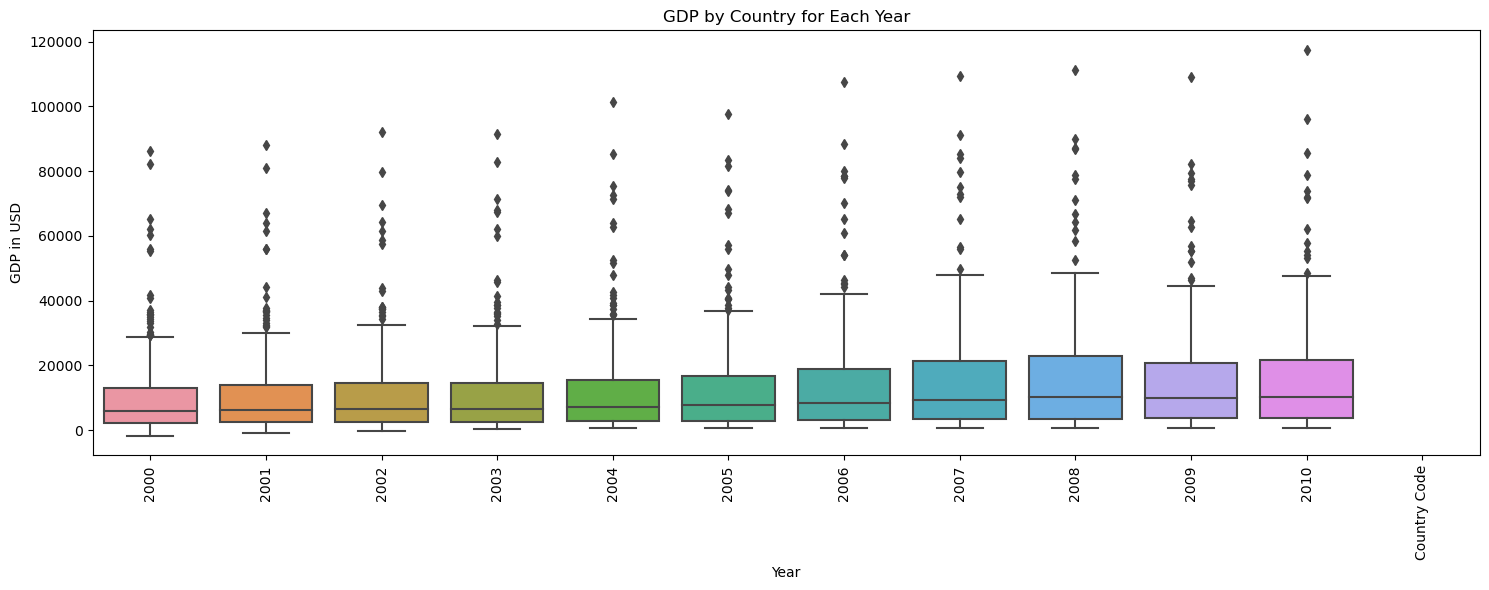

In [20]:

# Convert year columns to numeric, errors='coerce' will replace non-numeric values with NaN
year_columns = data.columns[1:]  # Assuming the first column is 'Country'
data[year_columns] = data[year_columns].apply(pd.to_numeric, errors='coerce')

# Reshape data from wide to long format
melted_data = data.melt(id_vars=["Country"], 
                        var_name="Year", 
                        value_name="GDP")

# Ensure that 'Year' is treated as a categorical variable
melted_data['Year'] = melted_data['Year'].astype('category')

# Plotting box plots for each year
plt.figure(figsize=(15, 6))
sns.boxplot(x="Year", y="GDP", data=melted_data)
plt.xticks(rotation=90)
plt.title('GDP by Country for Each Year')
plt.ylabel('GDP in USD')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


,Country,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,NaN,33120.054180,32117.912320,30862.222690,31387.282960,34176.464600,35207.577240,36362.219320,37865.493490,38515.263800,34693.086750,33732.847450
1,Afghanistan,NaN,548.158745,644.033820,839.485886,888.153370,885.840819,979.273979,1031.643135,1176.126357,1218.118215,1454.663015,1637.377987
2,Angola,NaN,3097.307292,3191.266323,3564.096026,3614.607278,3978.697194,4555.185842,5048.876449,5697.251328,6221.423373,6092.783245,6230.297028
3,Albania,NaN,3861.334172,4301.352799,4661.371553,4994.518807,5422.778462,5865.306196,6559.783257,7276.302969,8228.374239,8814.810856,9628.025783
4,Arab World,NaN,9415.632618,9584.108301,9581.797143,9974.641898,10937.316090,11646.486090,12442.187940,13041.925530,13739.727750,13640.846780,14127.778020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Kosovo,NaN,3688.088054,4782.379635,4820.697450,5200.329414,5476.113407,5983.304400,6390.420478,6983.879200,7249.409360,7506.898620,7782.875107
256,"Yemen, Rep.",NaN,3181.383522,3278.903531,3363.240378,3452.738165,3581.824687,3789.889382,3915.384569,4038.655597,4148.556849,4221.413776,4472.726448
257,South Africa,NaN,7719.255957,7994.262425,8315.442736,8613.587442,9136.414314,9796.154549,10524.346060,11240.260370,11667.849830,11416.001690,11728.160490
258,Zambia,NaN,1691.967387,1773.963693,1835.247757,1948.531639,2087.213343,2248.465939,2434.454195,2637.277877,2819.650593,3017.024571,3269.794329


(2651, 4)